In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('bigo.csv')
df

,seq_len,iso_count,n_dons,n_accs,time
0,300,0,1,4,0.000015
1,300,0,1,6,0.000012
2,300,0,3,1,0.000011
3,300,0,4,1,0.000010
4,300,0,3,2,0.000010
...,...,...,...,...,...
1863,1200,9536447801,51,53,13222.238820
1864,1200,20637893939,54,57,32296.450608
1865,1200,7328652191,42,58,8641.958949
1866,1200,100170830615,59,64,103111.924355


<Axes: title={'center': 'iso_count'}, xlabel='seq_len'>

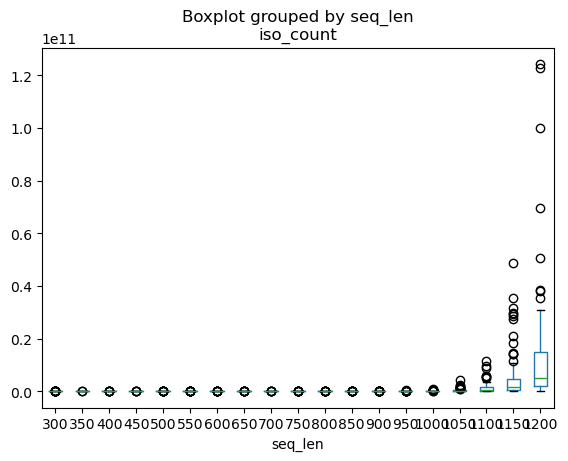

In [4]:
df.boxplot(by = 'seq_len', column = ['iso_count'], grid = False)

In [1]:
jt -l

NameError: name 'jt' is not defined